# Análise Exploratória

Dentro das etapas de <b> aprendizado de máquina </b> ou em inglês <i> machine learning</i>, sem dúvida uma das mais importante é o processo de entendimento e preparação de dados. E isso é bem evidenciado em artigos e blogs sobre aprendizado de máquina, na qual enfatizam que o tempo gasto nesses primeiros passos são os maiores, certa de 80%.

Assim uma vez coletado os dados é de suma importacia entendê-los, de modo a conhecer as suas variáveis, costumeiramente chamada de atributo ou, em inglês, *feature*, e como elas, sempre considerando também a relação entre elas, ajudam a definir a variável *target*, sendo esse o grande objetivo da aplicação de um modelo de aprendizado de máquina, ou em outras palavras, todo o processo desde a coleta de dados, passando pela preparação dos dados e definição do modelo a ser aplicado deve-se levar em conta, baseado no conjunto de dados que possui, o que se deseja prever, sendo então o objetivo da preparação de dados transforma-los em importantes informações, que sera consumido pelo seu modelo, para assim gerar a variável resposta.

Esse tutorial focará na primeira etapa de análise exploratória e para auxiliar no entendimentos dos conceitos iremos utilizar o dataset Titanic, que pode ser encontrado no Kaggle.

Esse dataset contém informações reais sobre os passageiros do famoso navio Titanic, que naufragou em 1912, e é composto por dois arquivos, um contendo os dados para o treinamento do modelo *train.csv* e outro contendo os dados de teste *test.csv*, sendo o objetivo, variável target, identificar quais passageiros sobreviveram ao naufrágio.

## 1) Leitura dos dados

In [21]:
# importa as libs necessárias
import matplotlib.pyplot as plt
import os 
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Leitura dos dados de treinamento
path = os.path.join('dados','train.csv')
train = pd.read_csv(path, delimiter = ",", index_col = 'PassengerId')
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Observem que o arquivo é composto por 891 linhas e 11 colunas, seriam 12, mas acabei considerando o id do passageiro como index do dataframe. <br>
Segue um breve descritivo de cada variável:

 - **Survived**: 0 se o passageiro morreu ou 1 se o passageiro sobreviveu
 - **Pclass**: A classe do passageiro (1°, 2° ou 3°)
 - **Name**: Nome do passageiro
 - **Sex**: Sexo do passageiro, masculino (*male*) ou feminino (*female*) 
 - **Age**: idade do passageiro
 - **SibSp**: a quantidade de conjugue ou irmãos a bordo
 - **Parch**: a quantidade de pais ou filhos a bordo
 - **Ticket**: o número do ticket do passageiro
 - **Fare**: tarifa paga pelo passageiro
 - **Cabin**: o número/referência da cabine do passageiro
 - **Embarked**: onde o passageiro embarcou, C = Cherbourg, Q = Queenstown ou S = Southampton
 
De posse dos dados o proximo passo é iniciar as primeiras exploratórias, sendo seu principal objetivo, a melhor compreende-los, verificando assim como eles podem nos auxiliar em nosso objetivo de determinar a subrevivencia ou não dos passageiros (conjunto teste).

## 2) Análise Exploratória

### 2.1) Valores duplicados

In [2]:
# Verifica a duplicidade nas linhas
any(train.duplicated())

False

No caso desse banco de dados não existe nenhum valor duplicado

### 2.2) Valores Ausentes (*Missing*)

In [3]:
# Procurando variáveis missing
print("Quantidade de valores missing")
print(train.isnull().sum())

print()
print("Percentual de valores missing")
print(round(train.isnull().mean(),3)*100)

Quantidade de valores missing
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Percentual de valores missing
Survived     0.0
Pclass       0.0
Name         0.0
Sex          0.0
Age         19.9
SibSp        0.0
Parch        0.0
Ticket       0.0
Fare         0.0
Cabin       77.1
Embarked     0.2
dtype: float64


Dentre as variáveis atributo temos 3 contendo variáveis missing, **Age** com 177 casos o que corresponde a quase 20% dos dados, **Cabin** com 687 casos correspondendo mais de 77% e **Embarked** com apenas 2 casos nem 1% dos dados.

### 2.3) *Outliers*

Antes de mais nada, o que significa *outliers*? <br>
Seriam, em uma definição mais simplista, ponto, ou conjunto de pontos, que destoam da maioria.  <br>
Diante disso uma outra importante questão seria: o que motivaria o surgimento de um outlier? <br>
Poderia ser devido a um erro, tal como de digitação, ou poderia ser devido a esse ponto, ou conjunto de pontos, pertencer a um fenômeno mais raro, ou seja, as ocorrencias destes serem bem menos frequentes em relação aos demais. <br>
Novamente enfatizo a importância da análise dos dados, pois um procedimento possível para o tratamento desses pontos seria sua eliminação, mas antes de fazer isso precisamos nos perguntar, qual é o objetivo do nosso modelo preditivo, se for identificar um fenomeno mais raro, tal como exemplo a detecção de fraude, a remoção desses pontos prejudicaria, e muito, a sua predição, pois é realmente esses pontos que queremos identificar.

Aqui mostrarei algumas formas de identificar esses pontos fora do padrão

#### Box-plot

O Box Plot é um gráfico utilizado para mostrar a dispersão dos dados. Importante entendê-lo antes de tirar qualquer conclusão, a linha central da caixa mostra o corte entre os 50% dos pontos acima e abaixo dele, ou seja, a mediana da amostra, a linha superior da caixa representa o 3° quartil (75% da amostra fica abaixo desse valor) e a linha inferior da caixa representa o 1° quartil (25% da amostra fica abaixo desse valor) o tamanho das barras verticais, que saem dessa caixa é dado por 1,5(Q3 - Q1) limitado ao maior valor da amostra, no caso da linha acima da caixa e ao menor valor ou zero no caso da linha abaixo da caixa, sendo então os outliers os pontos que superam, ou acima ou abaixo essa medida.

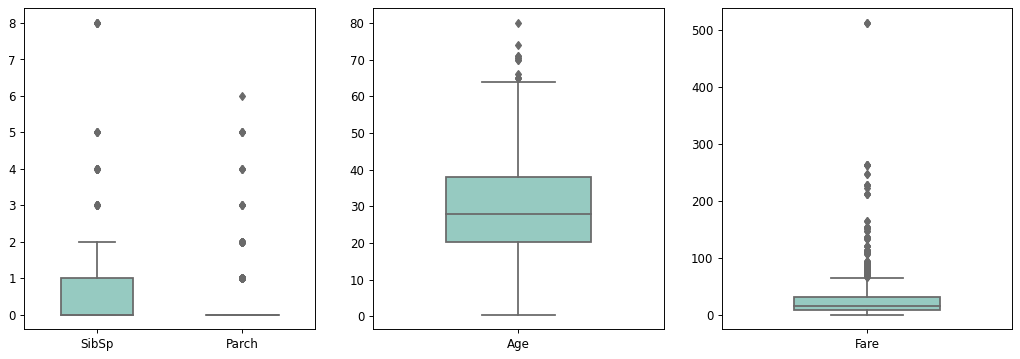

In [4]:
# Visualização das variáveis
# Via Box-Plot

# devido a diferença no range de cada variável vou separa-lás para ficar mais fácil a visualização
num_feature1 = ['SibSp', 'Parch']
num_feature2 = ['Age']
num_feature3 = ['Fare']

fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5), dpi=85)
sns.boxplot(data = train[num_feature1], width=0.5, palette="Set3", ax = axes[0])
sns.boxplot(data = train[num_feature2], width=0.5, palette="Set3", ax = axes[1])
sns.boxplot(data = train[num_feature3], width=0.5, palette="Set3", ax = axes[2])

#### Z-Score

Esse método pressupõe, que a amostra segue uma distribuição normal, de modo que os pontos mais prováveis de ocorrerem se situam mais próximos a média, já os menos prováveis se encontram mais nas caudas. Os pontos contidos entre 2 desvios corresponde a 95% da amostra e entre 3 desvios à 99%, sendo assim pontos que distam mais que 3 desvios, em relação a média, são mais raros de ocorrer, representando então os outliers.

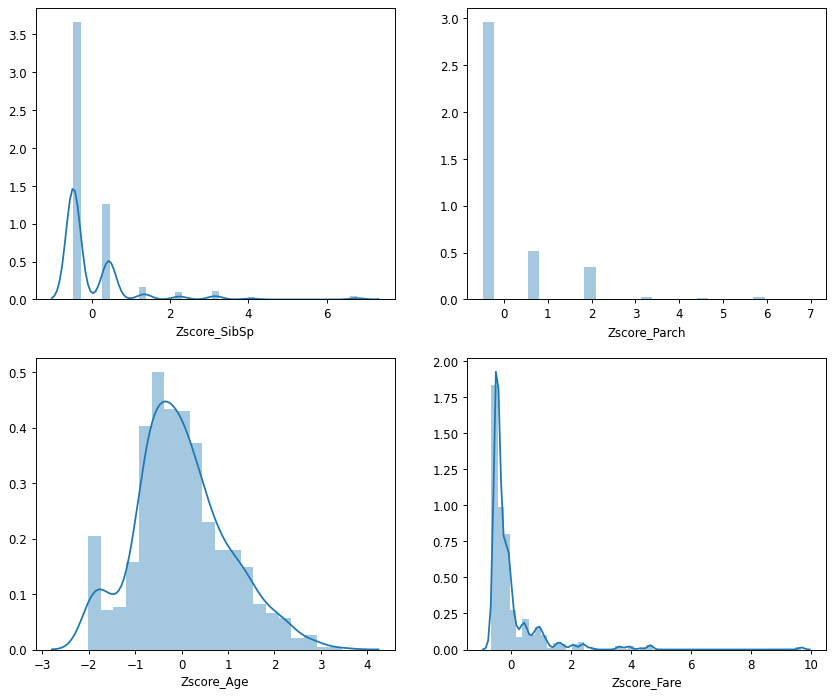

In [22]:
# Construção dos Z_SCORE (z = (x - mean)/desvio_padrao)

dfZS = train[['SibSp', 'Parch', 'Age', 'Fare']]

fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(nrows = 2,ncols = 2,figsize = (12,10), dpi=85)
axes = [ax1,ax2,ax3,ax4]

i=0
for c in dfZS.columns:
    c_name = 'Zscore_' + c
    dfZS[c_name] = (dfZS[c] - dfZS[c].mean())/dfZS[c].std()
    
    sns.distplot(dfZS[c_name], label = c_name, ax = axes[i]) 
    i += 1


Segundo essa técnica todos os pontos acima de 3 (eixo x) ou abaixo de -3 são considerados outliers. Embora não seja o escopo aqui, entendo ser importante salientar, como podemos notar nos gráficos, que as variáveis não seguem propriamente uma distribuição normal, por esse motivo, antes de tomar qualquer atitude sobre como tratar esses pontos, pondere bem o objetivo do seu modelo e qual método está aplicando.

Pelos dois métodos podemos identificar, segundo o seus críterios, varios outliers, mas não me parecem pontos produzidos via erro e sim alguma característica menos frequente, desse modo a sua remoção deve ocorrer com muita parcimônia, pois por um lado, dependendo de qual modelo esteja utilizando a sua utilização pode distorcer a resposta final, ou seja, utilizando como exemplo uma regressão linear, apenas um ponto pode mudar o coeficiente angular da reta impactando negativamente os seus resultados, por outro lado, ao eliminá-lo, podemos perder o poder de generalização dessa determinada característica, que para alguns tipos de problema é exatamente o que queremos identificar.

### Cardinalidade

In [20]:
dict_card = {}
for i in range(len(train.columns)):
    dict_card[train.columns[i]] = len(train.loc[:,train.columns[i]].unique())
dict_card

{'Survived': 2,
 'Pclass': 3,
 'Name': 891,
 'Sex': 2,
 'Age': 89,
 'SibSp': 7,
 'Parch': 7,
 'Ticket': 681,
 'Fare': 248,
 'Cabin': 148,
 'Embarked': 4}

Como era de se esperar Name e Ticket apresentaram uma alta cardinalidade, um representando o passageiro e outro o ticket associado a ele/familia, além delas outra três informações apresentam um número grande de valores diferentes, Fare, Cabin e Age. Para esses casos uma importante decisão a se tomar é se vamos manter esses dados da forma como estão ou agrupar em subgrupos menores.

### Balanceamento da variável resposta

Um outro ponto importante a se analisar, em um conjunto de dados, é a proporção das respostas no conjunto de dados, mais precisamente, verificar se estão balanceadas, ou em outras palavras, com proporções parecidas, ou desbalanceado. Lembrando que o desbalanceamento não necessariamente significa uma amostra ruim e sim um evento raro e isso pode ser encontrado em problemas de detecção de fraudes, eventos mais raros ou fora do comportamento normal do indivíduo, detecção de doenças entre outros problemas.

In [12]:
train[['Survived','Name']].groupby(['Survived'],as_index=True).count()/len(train)

,Name
Survived,
0,0.616162
1,0.383838


Observem que possuimos apenas 38% dos passageiros na classe de sobreviventes, o que mostra um leve desbalanceamento.